In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import cv2 
from skimage.feature import hog
import glob

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

In [2]:
pedestrians = glob.glob('tareas/data/pedestrians128x64/*.ppm')
no_pedestrians = glob.glob('tareas/data/pedestrians_neg2/*.png')

In [3]:
len(no_pedestrians)

934

In [4]:
images = []
y = []

for path in pedestrians:
    img = cv2.imread(path, 0)
    images.append(img)
    y.append(1)

for path in no_pedestrians:
    img = cv2.imread(path, 0)
    img = cv2.resize(img, (64, 128), interpolation = cv2.INTER_AREA)
    images.append(img)
    y.append(0)

images = np.array(images,  dtype='float') / 255.0
y = np.array(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size = 0.3, random_state = 42)

In [6]:
print(X_train.shape)
print(X_test.shape)

(1300, 128, 64)
(558, 128, 64)


In [7]:
num_pixels = 8192
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(1300, 8192)
(558, 8192)


In [8]:
model = Sequential()
model.add(Dense(units = 30, input_dim=num_pixels, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=15, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                245790    
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 246,271
Trainable params: 246,271
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(lr=1e-3), loss=BinaryCrossentropy(), metrics=['accuracy'])

c:\Users\roroa\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
41/41 [==============================] - 6s 36ms/step - loss: 0.5880 - accuracy: 0.6646 - val_loss: 0.4690 - val_accuracy: 0.7975
Epoch 2/100
41/41 [==============================] - 1s 18ms/step - loss: 0.4638 - accuracy: 0.7646 - val_loss: 0.3799 - val_accuracy: 0.8369
Epoch 3/100
41/41 [==============================] - 1s 17ms/step - loss: 0.3814 - accuracy: 0.8169 - val_loss: 0.3365 - val_accuracy: 0.8656
Epoch 4/100
41/41 [==============================] - 1s 17ms/step - loss: 0.3444 - accuracy: 0.8485 - val_loss: 0.3204 - val_accuracy: 0.8763
Epoch 5/100
41/41 [==============================] - 1s 13ms/step - loss: 0.3137 - accuracy: 0.8677 - val_loss: 0.2852 - val_accuracy: 0.8961
Epoch 6/100
41/41 [==============================] - 0s 12ms/step - loss: 0.2978 - accuracy: 0.8854 - val_loss: 0.3195 - val_accuracy: 0.8817
Epoch 7/100
41/41 [==============================] - 1s 13ms/step - loss: 0.2713 - accuracy: 0.8815 - val_loss: 0.3065 - val_accuracy: 0.8925
Epoch 

In [11]:
score = model.evaluate(X_test, y_test)
print(f'Test score {score[0]}')
print(f'Test accuracy {score[1]}')

18/18 [==============================] - 0s 8ms/step - loss: 0.1942 - accuracy: 0.9588
Test score 0.1941618174314499
Test accuracy 0.958781361579895


Text(0.5, 0, 'epoch')

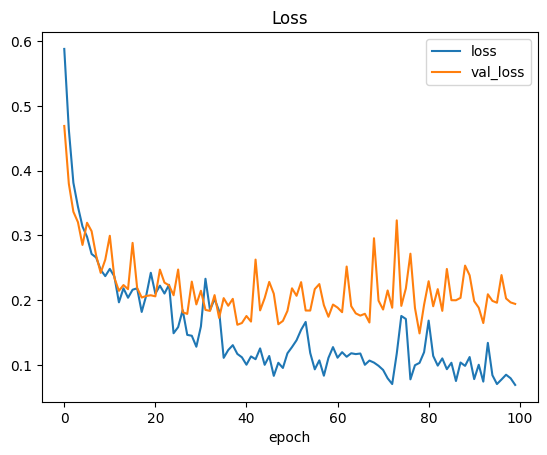

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

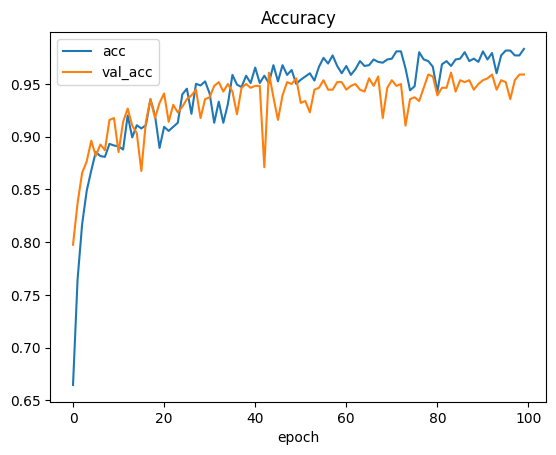

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [14]:
y_predict = (model.predict(X_test)> 0.3).astype("int32")

18/18 [==============================] - 0s 6ms/step


<Axes: >

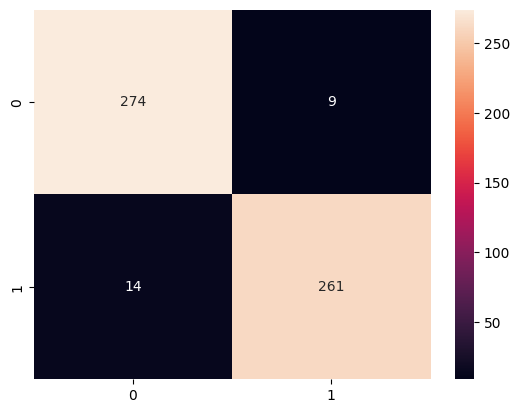

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d")

In [16]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       283
           1       0.97      0.95      0.96       275

    accuracy                           0.96       558
   macro avg       0.96      0.96      0.96       558
weighted avg       0.96      0.96      0.96       558

